In [3]:
import pandas as pd
import dataframe as df
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'dataframe'

In [8]:
df = pd.read_csv("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\blogs.csv",encoding = 'latin-1')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [9]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [10]:
label_encoder = LabelEncoder()
df['Labels_encoded'] = label_encoder.fit_transform(df['Labels'])
df

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [11]:
df

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [12]:
df[df['Labels'] == 'alt.atheism']    #filtering

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
95,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
96,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
97,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0
98,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0


In [13]:
df[df['Labels']=='talk.religion.misc']

,Data,Labels,Labels_encoded
1900,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1901,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc,19
1902,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1903,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1904,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [14]:
 alt_atheism = df[df['Labels'] == 'alt.atheism']

In [15]:
talk_religion_misc = df[df['Labels']=='talk.religion.misc']

In [16]:
alt_atheism

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
95,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
96,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
97,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0
98,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0


In [17]:
talk_religion_misc

,Data,Labels,Labels_encoded
1900,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1901,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc,19
1902,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1903,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1904,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [18]:
#worldcloud function

In [19]:
alt_atheism['Data']

0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
                            ...                        
95    Newsgroups: alt.atheism\nPath: cantaloupe.srv....
96    Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
97    Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....
98    Newsgroups: alt.atheism\nPath: cantaloupe.srv....
99    Newsgroups: alt.atheism\nPath: cantaloupe.srv....
Name: Data, Length: 100, dtype: object

In [20]:
talk_religion_misc['Data']

1900    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1901    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
1902    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1903    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1904    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
                              ...                        
1995    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997    Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1999    Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...
Name: Data, Length: 100, dtype: object

In [21]:
' '.join(alt_atheism['Data']) #joining all rows into paragraph

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [22]:
def wordcl(data,heading):
    txt = ' '.join(data['Data'])
    wc = WordCloud(background_color='white',width=700, height=200,
                  colormap='viridis').generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

In [24]:
import wordcloud as wc
wordcl(alt_atheism,'alt_atheism')

ModuleNotFoundError: No module named 'wordcloud'

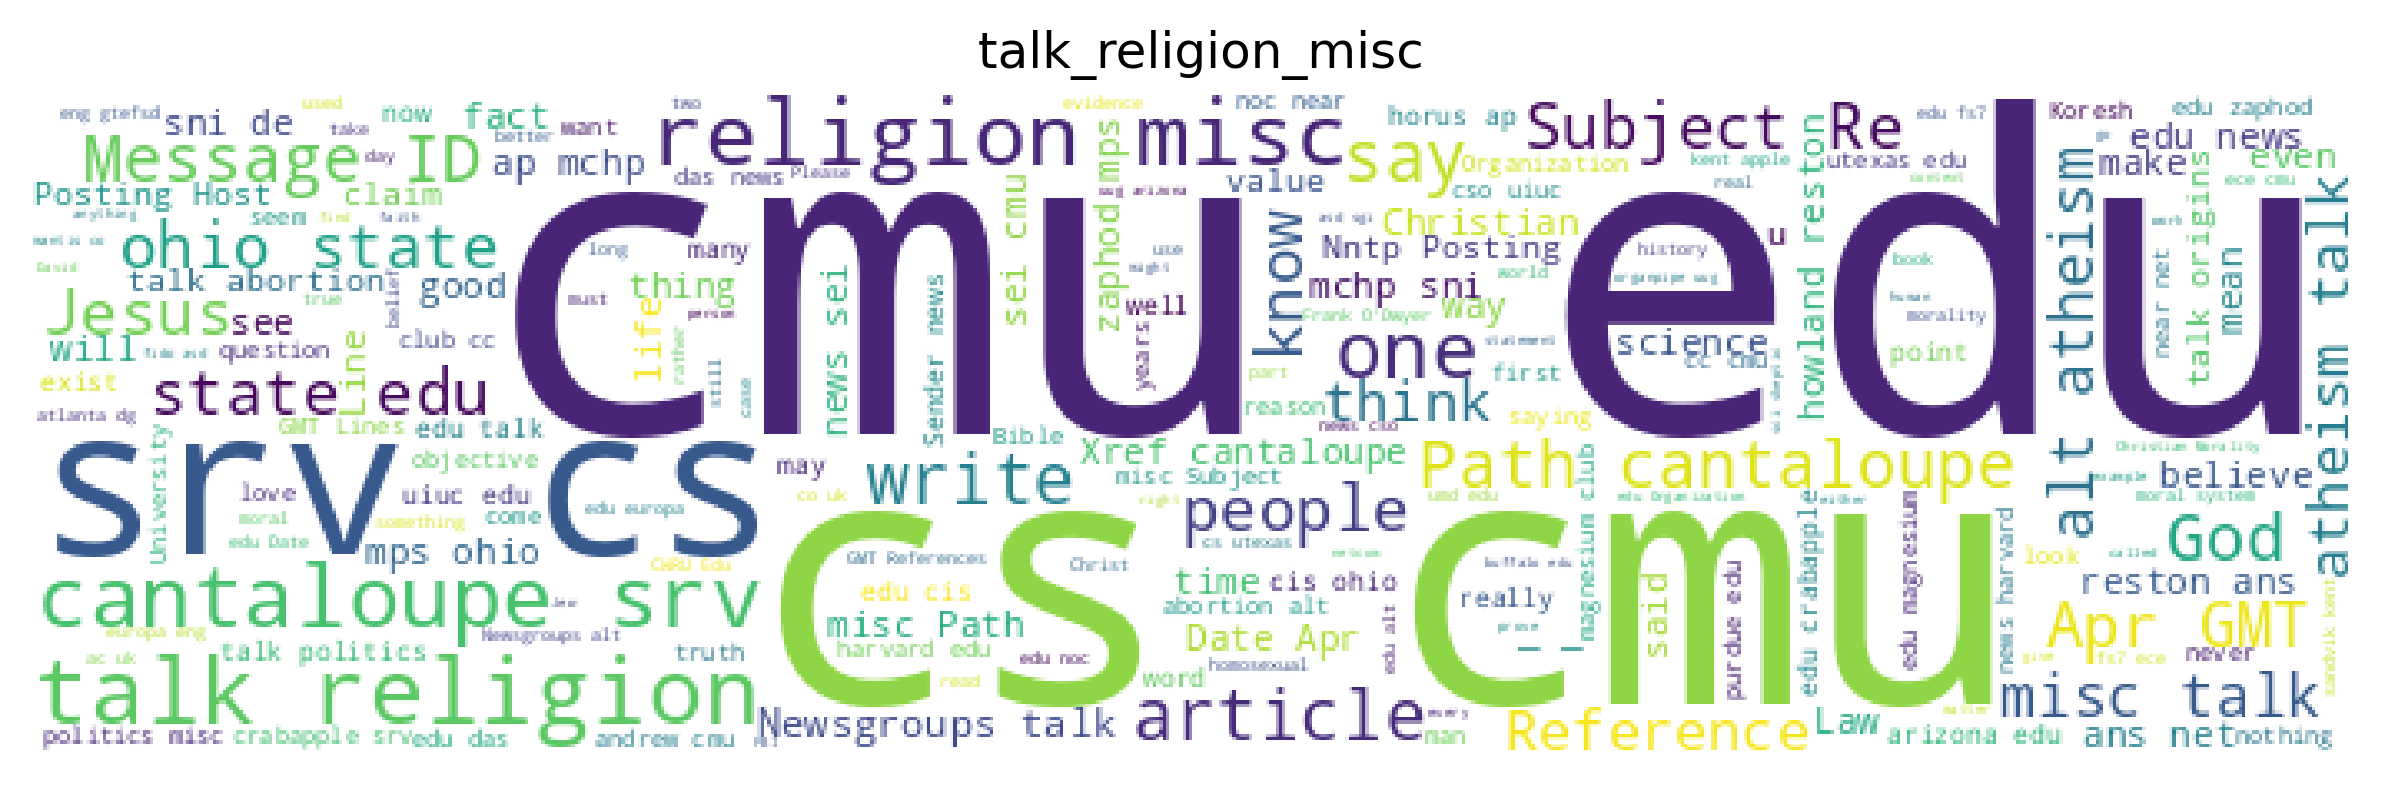

In [53]:
wordcl( talk_religion_misc,'talk_religion_misc')

In [55]:
#Text Cleaning

In [25]:
df

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [26]:
lemma = WordNetLemmatizer()

In [27]:
nltk.download('stopwords')         #this downloads are compulsory
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdabd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mdabd\AppData\Roaming\nltk_data...


True

In [28]:
range(len(df))

range(0, 2000)

In [29]:
df['Data'][0]

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [ ]:
corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]',' ',df['Data'][i]) #Clean the text
    msg = msg.lower() #Text normalization
    msg = msg.split() #Word tokenize
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg = ' '.join(msg) # Join sentences
    corpus.append(msg)

In [ ]:
corpus

In [ ]:
#Model Building

In [ ]:
#Feature Extraction

In [ ]:
#Tf-IDF

In [ ]:
df

In [ ]:
y = df['Labels_encoded']
y

In [ ]:
tf = TfidfVectorizer()

x_data = tf.fit_transform(corpus)
x_data = x_data.toarray()
x_data

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x_data,y,test_size=0.2, random_state=1)

In [ ]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

print(f"Train Accuracy: {nb.score(xtrain,ytrain)}\nTest Accuracy: {nb.score(xtest,ytest)}")